In [59]:
import numpy as np
import matplotlib.pyplot as plt

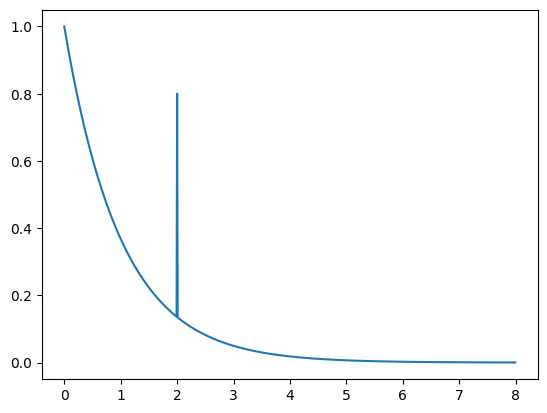

In [60]:
Fs = 100
t = np.arange(0,8, 1/Fs)
x1 = np.exp(-t)
x1[np.uint(2/0.01)]=0.8
plt.plot(t,x1)
plt.show()

In [61]:
def EspectroMagnitudFourier(t, x):
    N = len(t)
    Fs = 1/np.mean(np.diff(t))
    x_fft = np.fft.fftshift(np.fft.fft(x))
    f = np.fft.fftshift(np.fft.fftfreq(N, 1/Fs))
    plt.plot(f, np.abs(x_fft))

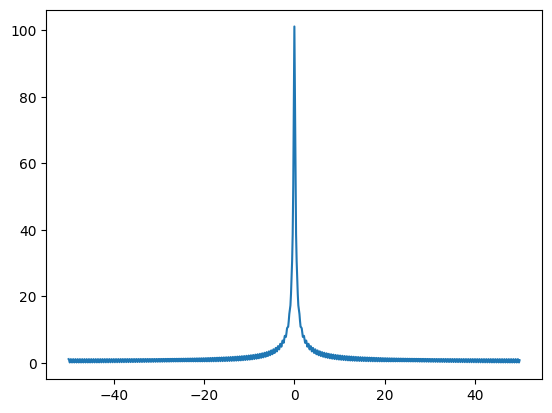

In [62]:
EspectroMagnitudFourier(t,x1)

In [63]:
from scipy.signal import chirp

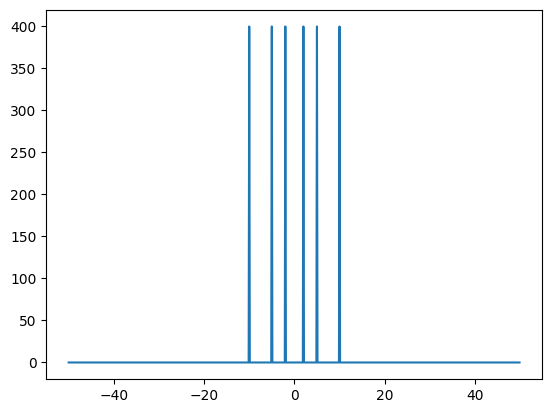

In [64]:
x2 = np.sin(2*np.pi*2*t)+np.sin(2*np.pi*5*t)+np.sin(2*np.pi*10*t)
EspectroMagnitudFourier(t,x2)

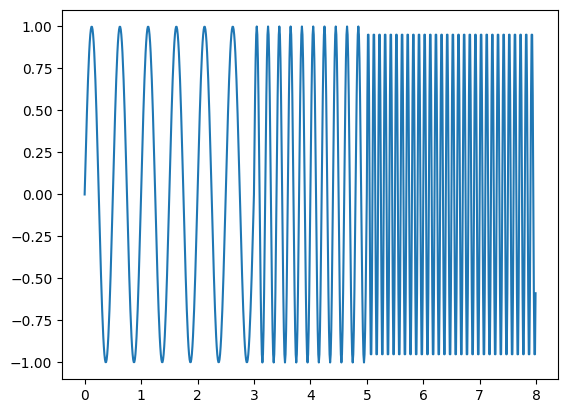

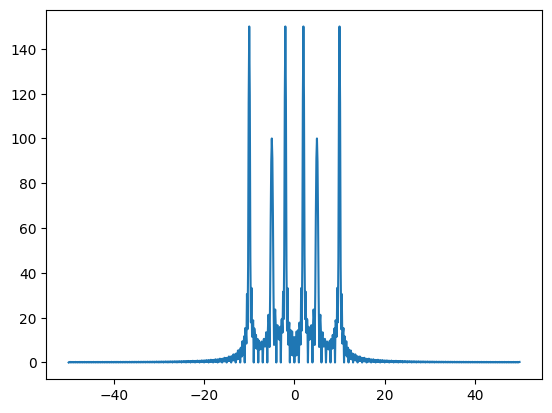

In [65]:
x3 = np.zeros(t.shape)
t1 = np.uint(3/0.01)
t2 = np.uint(5/0.01)
x3[0:t1] = np.sin(2*np.pi*2*t[0:t1])

x3[t1:t2] = np.sin(2*np.pi*5*t[t1:t2])
x3[t2:] = np.sin(2*np.pi*10*t[t2:])
plt.plot(t,x3)
plt.show()



EspectroMagnitudFourier(t,x3)

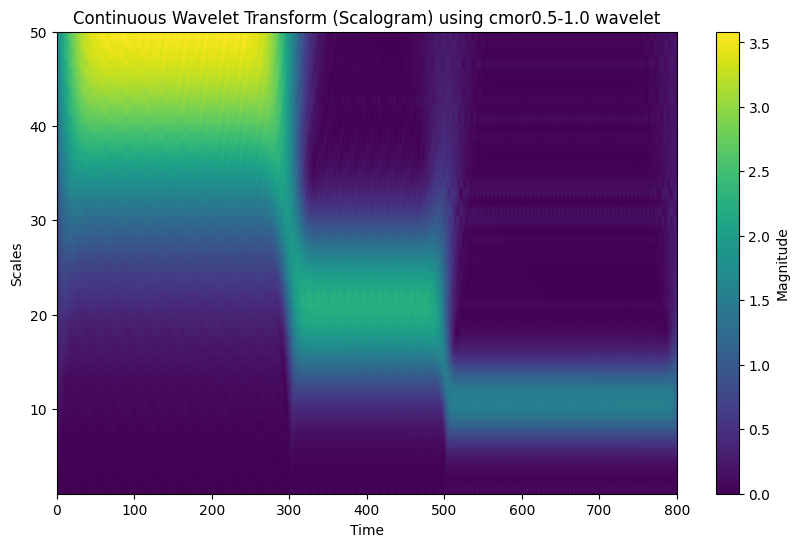

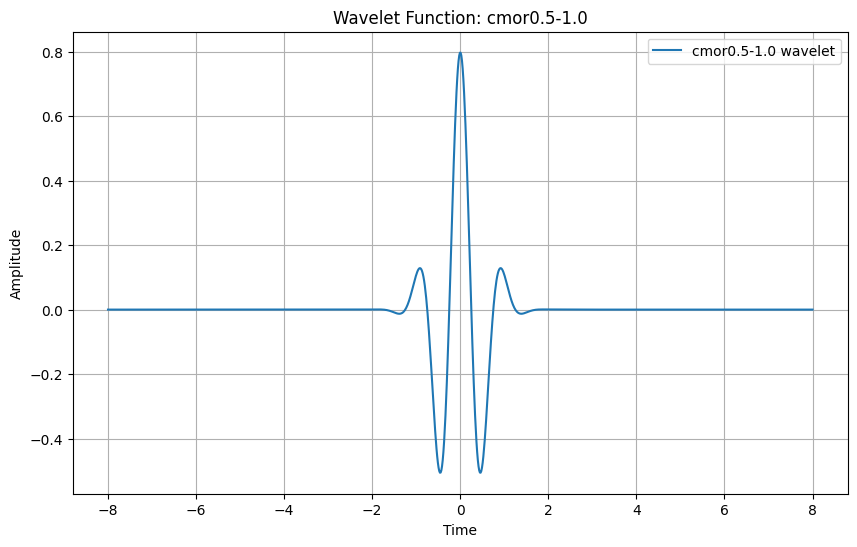

In [66]:
import scaleogram as scg  # Assuming you have `scaleogram` installed.
import pywt


# Define the scales (`scales`)
num_points = x3.shape[0]
max_scale2 = 50  # You can adjust this based on your requirements
scales = np.arange(1, max_scale2 + 1)  # Proper definition of scales

# Define the wavelet to be used for the CWT
wavelet_name = "cmor0.5-1.0"  

# Compute the Continuous Wavelet Transform (CWT)
coef, freqs = pywt.cwt(x3, scales, wavelet=wavelet_name)

# Plot the scalogram
plt.figure(figsize=(10, 6))
plt.imshow(
    np.abs(coef),
    aspect="auto",
    extent=[0, num_points, scales[-1], scales[0]],
    cmap="viridis",
)
plt.colorbar(label="Magnitude")
plt.ylabel("Scales")
plt.xlabel("Time")
plt.title(f"Continuous Wavelet Transform (Scalogram) using {wavelet_name} wavelet")
plt.gca().invert_yaxis()  # Invert y-axis to have larger scales at the bottom
plt.show()

# Plot the mother wavelet function
wavelet = pywt.ContinuousWavelet(wavelet_name)

# Get the wavelet function (psi) and time points (x)
psi, x = wavelet.wavefun(level=10)  # Level determines the resolution

# Plotting the wavelet function (psi)
plt.figure(figsize=(10, 6))
plt.plot(x, psi, label=f"{wavelet_name} wavelet")
plt.xlabel("Time")
plt.ylabel("Amplitude")
plt.title(f"Wavelet Function: {wavelet_name}")
plt.grid(True)
plt.legend()
plt.show()

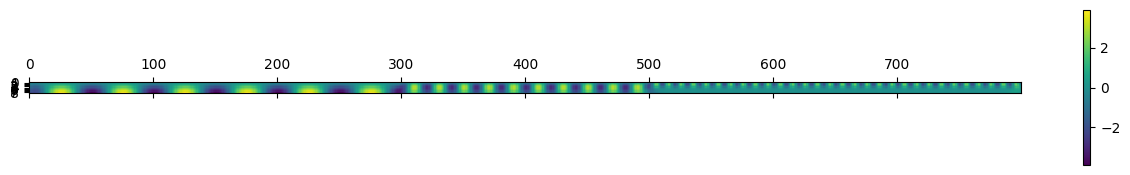

In [67]:
import pywt
import scaleogram as scg
import scipy.io as sio

anchos = np.uint(np.arange(1,np.log2(x3.shape[0])))

coef, freqs = pywt.cwt(x3,anchos,"gaus1") 
plt.matshow(coef)
plt.colorbar()
plt.show()

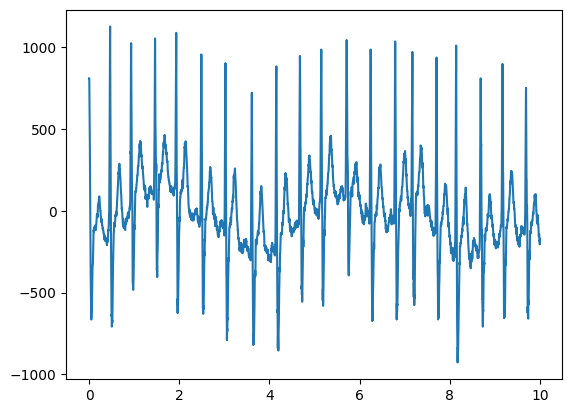

In [68]:
data = sio.loadmat("../../data/JS00001.mat")
ecg001 = data["val"][9, :]
t = np.linspace(0,10, 5000)
plt.plot(t,ecg001)

In [69]:
import scipy.signal as sig
t_decimate=sig.decimate(t, 2)

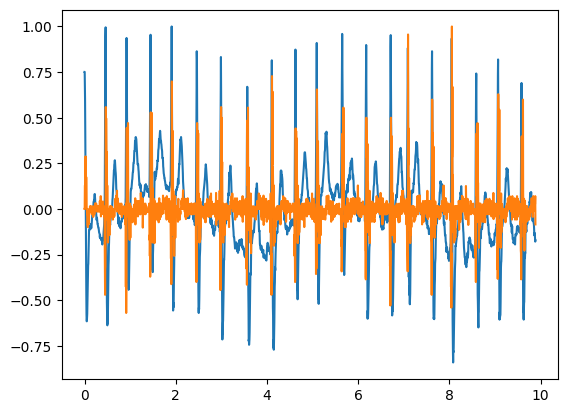

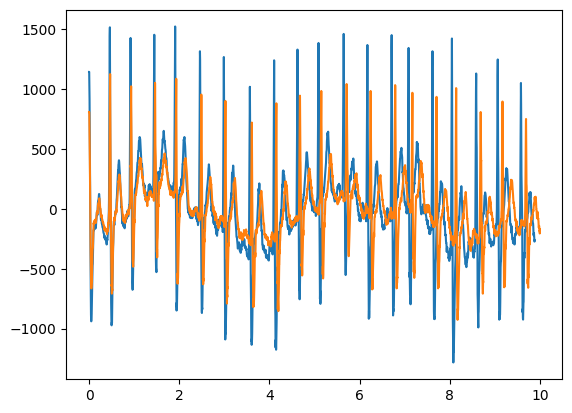

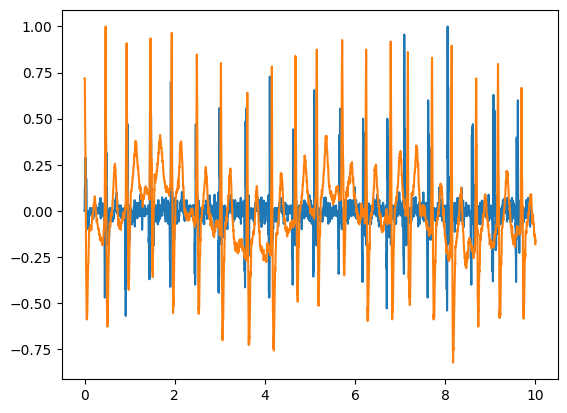

In [70]:
coef_lvl1 = pywt.dwt(ecg001, wavelet="db1")
plt.plot(t_decimate, coef_lvl1[0]/np.max(coef_lvl1[0]))
plt.plot(t_decimate, coef_lvl1[1]/np.max(coef_lvl1[1]))
plt.show()

plt.plot(t_decimate, coef_lvl1[0])
plt.plot(t, ecg001)
plt.show()

plt.plot(t_decimate, coef_lvl1[1]/np.max(coef_lvl1[1]))
plt.plot(t,ecg001/np.max(ecg001))

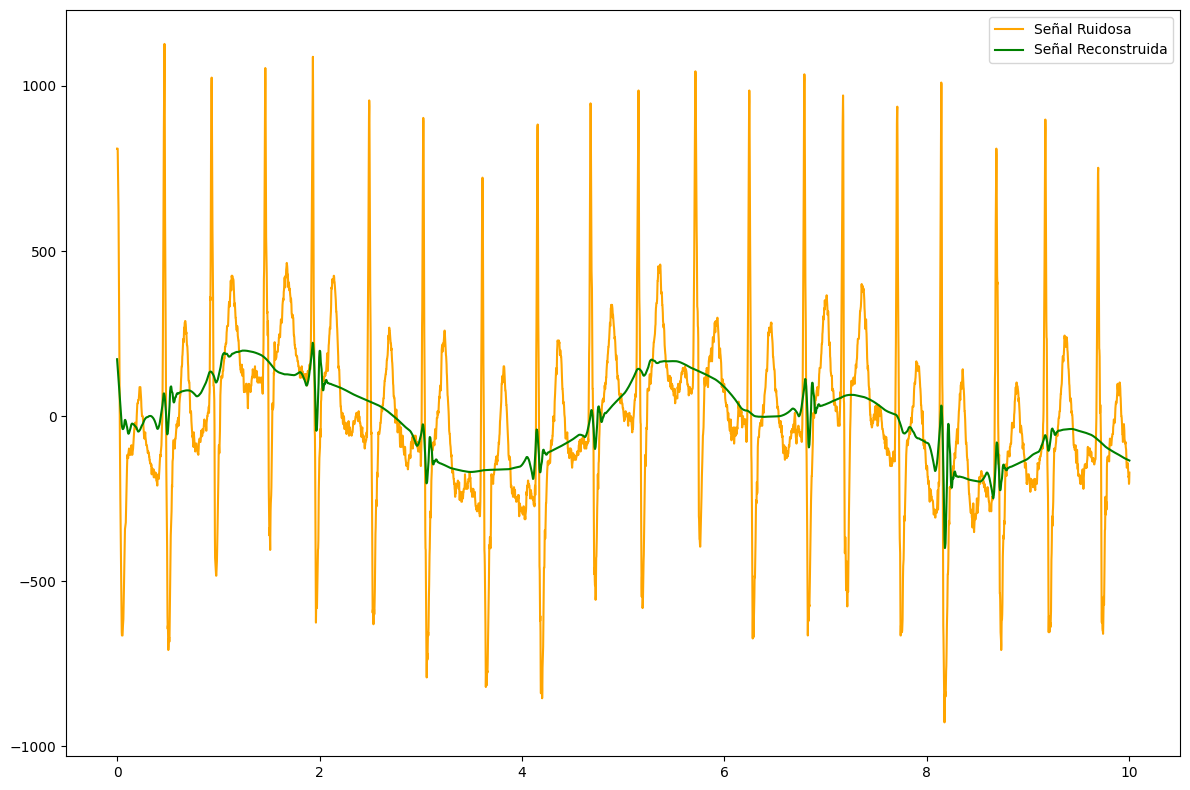

In [71]:
# Descomposición con la Transformada Wavelet Discreta
wavelet = "db4"  # Elegimos la wavelet Daubechies de nivel 4
max_level = pywt.dwt_max_level(len(ecg001), wavelet)
coeffs = pywt.wavedec(ecg001, wavelet, level=max_level)


# Apply soft thresholding to detail coefficients
coeffs_thresh = [coeffs[0]]  # Keep approximation coefficients unchanged
coeffs_thresh.extend(
    pywt.threshold(detail, 2000, mode="soft") for detail in coeffs[1:]
)


# Reconstrucción de la señal desde los coeficientes
reconstructed_signal = pywt.waverec(coeffs_thresh, wavelet)

# Visualización de la señal original, ruidosa y reconstruida
plt.figure(figsize=(12, 8))

# Señal image
plt.plot(t, ecg001, label="Señal Ruidosa", color="orange")
plt.plot(t, reconstructed_signal, label="Señal Reconstruida", color="green")

plt.legend()
plt.tight_layout()
plt.show()

In [72]:
import cv2
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
import numpy as np
import pywt
import pywt.data

original = cv2.imread("../../data/female-chest-x-ray.jpg", cv2.IMREAD_GRAYSCALE)

[[0.70710678]
 [0.70710678]]
float32


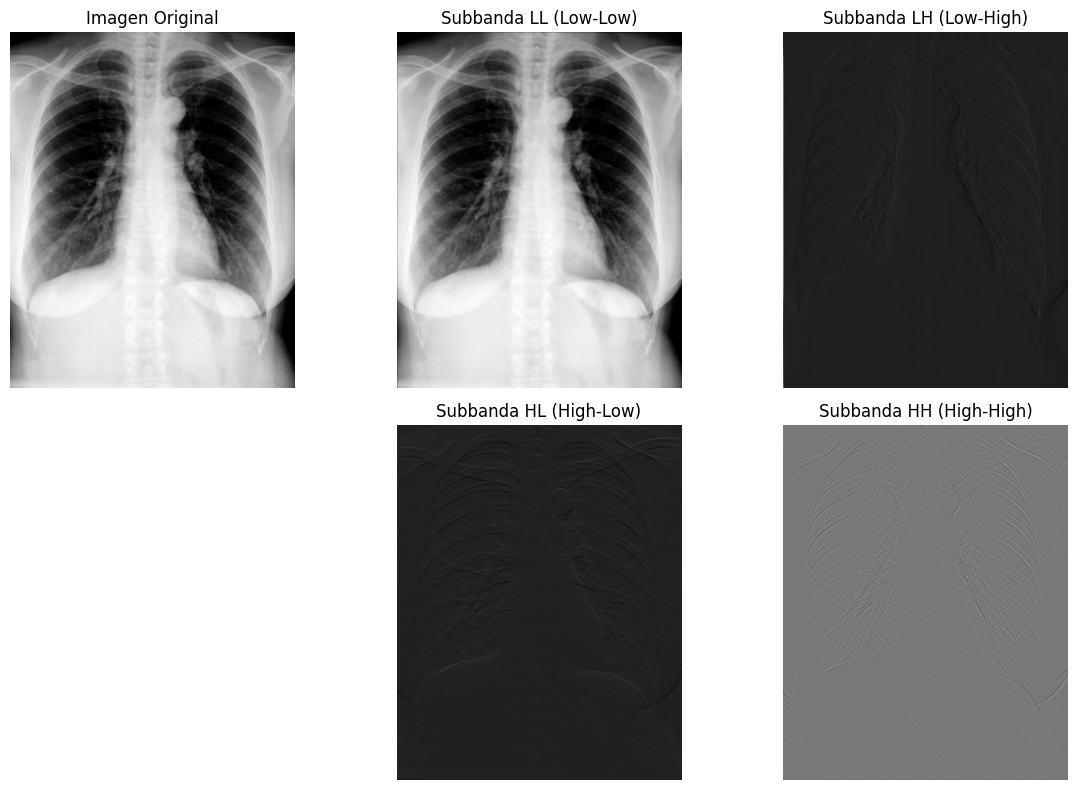

In [ ]:
from scipy.signal import convolve2d

# Filtros de paso bajo y paso alto para la wavelet Haar
low_pass = np.array([1, 1]) / np.sqrt(2)
high_pass = np.array([1, -1]) / np.sqrt(2)

print(low_pass[:, None])

# Convolución en las filas
LL_rows = convolve2d(original, low_pass[:, None], mode="same")  # Paso bajo en filas
HL_rows = convolve2d(original, high_pass[:, None], mode="same")  # Paso alto en filas

# Convolución en las columnas
LL_scratch = convolve2d(LL_rows, low_pass[None, :], mode="same")  # Paso bajo en columnas
LH_scratch = convolve2d(LL_rows, high_pass[None, :], mode="same")  # Paso alto en columnas
HL_scratch = convolve2d(
    HL_rows, low_pass[None, :], mode="same"
)  # Paso bajo en columnas
HH_scratch = convolve2d(
    HL_rows, high_pass[None, :], mode="same"
)  # Paso alto en columnas

# Visualización de las subbandas
plt.figure(figsize=(12, 8))

plt.subplot(2, 3, 1)
plt.title("Imagen Original")
plt.imshow(original, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 2)
plt.title("Subbanda LL (Low-Low)")
plt.imshow(LL_scratch, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 3)
plt.title("Subbanda LH (Low-High)")
plt.imshow(LH_scratch, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 5)
plt.title("Subbanda HL (High-Low)")
plt.imshow(HL_scratch, cmap="gray")
plt.axis("off")

plt.subplot(2, 3, 6)
plt.title("Subbanda HH (High-High)")
plt.imshow(HH_scratch, cmap="gray")
plt.axis("off")

plt.tight_layout()
plt.show()

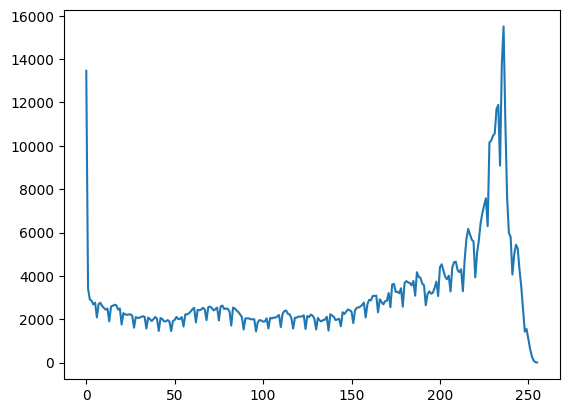

In [81]:
imagen_oscura = np.uint8(cv2.normalize(LL_scratch, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX))
histograma = cv2.calcHist([imagen_oscura], [0], None, [256], [0, 256])
plt.plot(histograma)

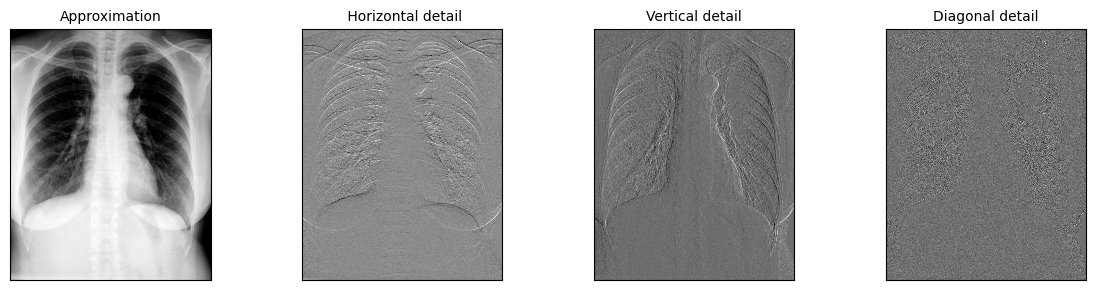

In [74]:

# Load image
#original = pywt.data.camera()

# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'haar')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])

fig.tight_layout()
plt.show()

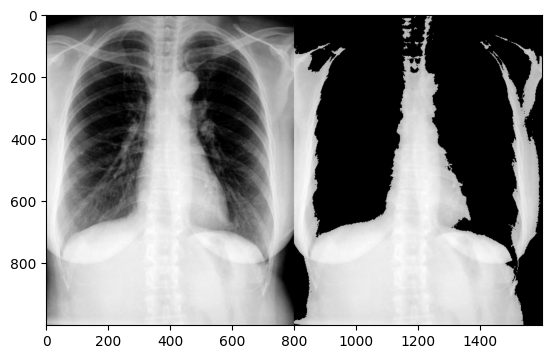

In [75]:
th1 = 0.7*np.max([LL,HL,LH,HH])
LL[LL<th1]=0
HL[HL<th1]=0
LH[LH<th1]=0
HH[HH<th1]=0
coeffs2_denoise = (LL, (LH, HL, HH))
imagen_recons=pywt.idwt2(coeffs2_denoise, wavelet="haar")
plt.imshow(np.hstack((original, imagen_recons)), cmap="gray")

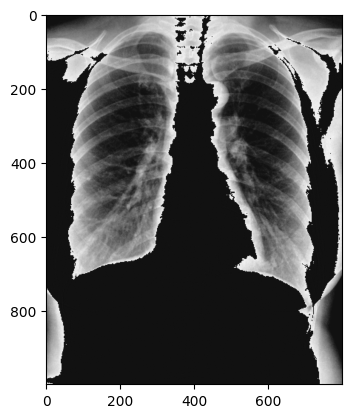

In [76]:
plt.imshow(original-imagen_recons, cmap="gray")